In [1]:
import matplotlib.pyplot as plt
import numpy as np

#    np.random.seed(42)

# 1.randomly generating outcomes for the 10,000 gamblers
outcome=[1,-1]
outcomes=np.random.choice(outcome,(10000,1000))

#2.setting the starting wealth to be 100
medi=np.full((10000,1001),100)
medi[0:,1:]=outcomes

#3.calculating bankroll over time
trajectory=np.cumsum(medi,axis=1)

#4.Adjusting trajectory to handle bankruptcy
mask=np.cumprod(trajectory>0,axis=1)
trajectory=trajectory*mask

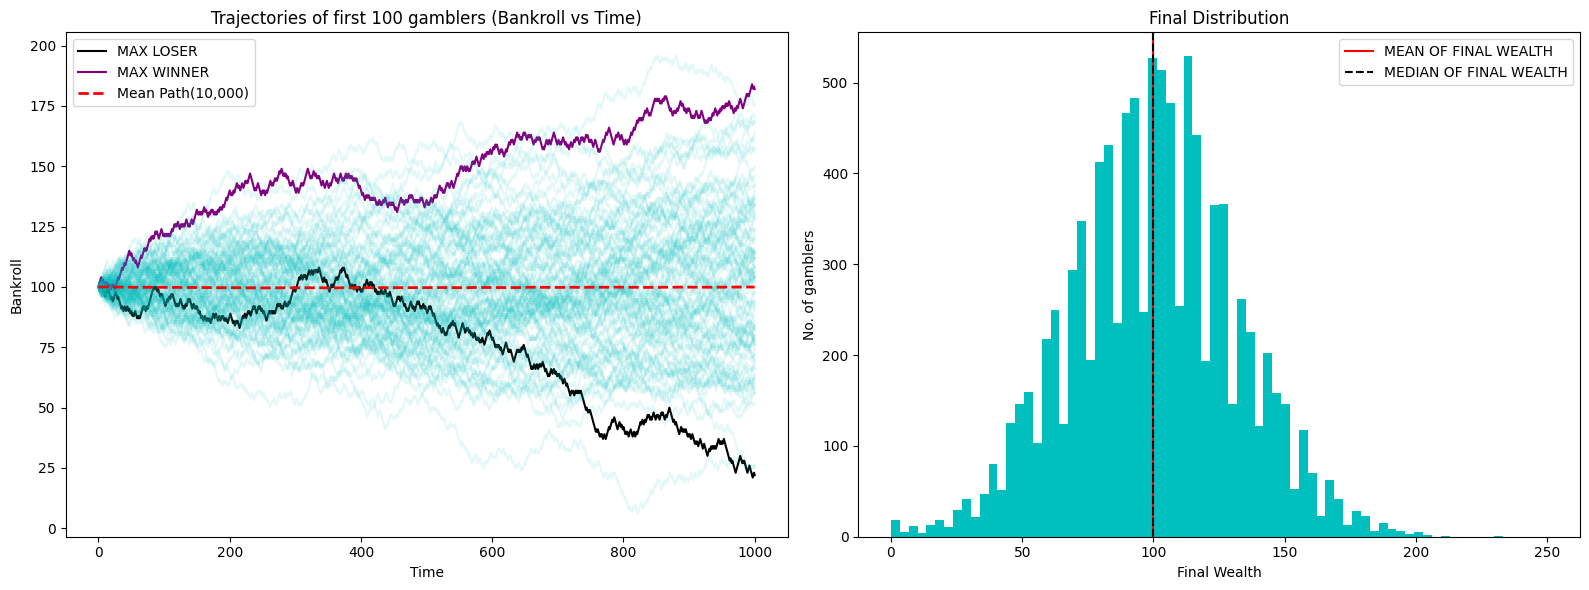

In [2]:
#PLOTS

#5.initializing variables for first 100 gamblers
trajectory_100=trajectory[:100,:]
max=np.argmax(trajectory_100[:,-1])
min=np.argmin(trajectory_100[:,-1])

#6.initializing mean and median of final wealth of the gamblers
mean=np.mean(trajectory,axis=0)
median=np.median(trajectory,axis=0)

#7.adjusting 2 subplots
fig, axes=plt.subplots(1,2,figsize=(16,6))

#8.The spaghetti plot of the first 100 gamblers
ax=axes[0]

Gamblers, Steps = trajectory_100.shape
steps=np.arange(Steps)

for i in range(Gamblers):
    if(i==min):
      ax.plot(steps, trajectory_100[i], alpha=1,color='black',label="MAX LOSER")
      continue
    elif(i==max):
      ax.plot(steps, trajectory_100[i], alpha=1,color='purple',label="MAX WINNER")
      continue
    else:
      ax.plot(steps, trajectory_100[i], alpha=0.1,color='c')

ax.plot(steps, mean, alpha=1 , linestyle='--', color='r',linewidth=2,label='Mean Path(10,000)')

ax.set_xlabel('Time')
ax.set_ylabel('Bankroll')
ax.set_title('Trajectories of first 100 gamblers (Bankroll vs Time)')

ax.legend()

#9.Final distribution histogram of all 10,000 gamblers
ax=axes[1]

bins=np.linspace(0,250,75)

ax.hist(trajectory[:,-1],bins=bins,color='c')

ax.axvline(mean[-1],color='r',linestyle='-',label="MEAN OF FINAL WEALTH")
ax.axvline(median[-1],color='black',linestyle='--',label="MEDIAN OF FINAL WEALTH")

ax.set_xlabel('Final Wealth')
ax.set_ylabel('No. of gamblers')
ax.set_title('Final Distribution')

ax.set_xticks([0,50,100,150,200,250])
#ax.set_xticks(bins)

ax.legend()

plt.tight_layout()
plt.show()